# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#importing necessary libraries to complete assignment
import pandas as pd
import requests
import tweepy
import numpy as np
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
import seaborn as sns; sns.set()



In [2]:
#read in the dataset for the archive

archive = pd.read_csv('twitter-archive-enhanced.csv')

archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
prediction = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


since my developer account was suspended i was unable to utilize the Twitter API, we will be using the tweet-json file to load and store in a list in the box below.

In [4]:
json_data = []

with open('tweet-json') as json_file:
    for line in json_file:
        json_data.append(json.loads(line))
        
        
df_api = pd.DataFrame(json_data)

#select columns of interest
columns_of_interest = ['id', 'retweet_count', 'favorite_count']
df_api = df_api[columns_of_interest]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
df_api

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [6]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [7]:
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1307,753420520834629632,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,balloon,0.267961,False,lakeside,0.085764,False,rapeseed,0.040809,False
928,702684942141153280,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,1,golden_retriever,0.514085,True,Chesapeake_Bay_retriever,0.173224,True,Brittany_spaniel,0.118384,True
1823,834931633769889797,https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg,1,ice_bear,0.330573,False,soft-coated_wheaten_terrier,0.196476,True,Irish_terrier,0.073097,True
1396,767884188863397888,https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg,3,coral_reef,0.327740,False,cliff,0.157182,False,lakeside,0.048810,False
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False
2043,885984800019947520,https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg,1,Blenheim_spaniel,0.972494,True,Shih-Tzu,0.006630,True,Bernese_mountain_dog,0.006239,True
107,667873844930215936,https://pbs.twimg.com/media/CUTDtyGXIAARxus.jpg,1,common_iguana,0.999647,False,frilled_lizard,0.000181,False,African_chameleon,0.000128,False
65,667174963120574464,https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg,1,toy_poodle,0.266437,True,Chihuahua,0.243223,True,bluetick,0.072806,True
1339,758474966123810816,https://pbs.twimg.com/media/Coak48zWAAAhBxV.jpg,1,Pembroke,0.546145,True,Cardigan,0.244200,True,German_shepherd,0.100429,True
674,683391852557561860,https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg,1,French_bulldog,0.992833,True,Boston_bull,0.004749,True,pug,0.001392,True


In [9]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2241,667915453470232577,NaN,NaN,2015-11-21 04:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Otis. He is a Peruvian Quartzite. Pic spo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667915453...,10,10,Otis,None,None,None,None
1554,688898160958271489,NaN,NaN,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688898160...,10,10,None,None,None,None,None
1449,696100768806522880,NaN,NaN,2016-02-06 22:38:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This poor pupper has been stuck in a vortex si...,NaN,NaN,NaN,https://vine.co/v/i1KWj0vbvA9,10,10,None,None,None,pupper,None
170,859074603037188101,NaN,NaN,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859074603...,13,10,None,None,None,None,None
428,821149554670182400,NaN,NaN,2017-01-17 00:18:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luca. He got caught howling. H*ckin em...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821149554...,12,10,Luca,None,None,None,None
658,791672322847637504,NaN,NaN,2016-10-27 16:06:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When she says you're a good boy and you know y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
706,785533386513321988,NaN,NaN,2016-10-10 17:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dallas. Her tongue is ridiculous. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785533386...,11,10,Dallas,None,None,None,None
2233,668204964695683073,NaN,NaN,2015-11-21 23:10:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ron. Ron's currently experiencing a br...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668204964...,8,10,Ron,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
347,831911600680497154,NaN,NaN,2017-02-15 17:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kuyu. He was trapped in a well for 10 day...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831911600...,14,10,Kuyu,None,None,None,None


In [11]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality issues
1. ID fields datatypes are incorrect should be objects

2.Status id's and user id's need to be objects

3. The Values for in_reply_to_status_id, in_reply_to_user_id, retweeted_user_id, retweeted_statuts_user_id, 	retweeted_status_timestamp have some NaN Values that need to be removed.

4.Rating Numerator and Deniminator need to be extracted from the text column Archive

5.  Missing dog names in name Column

6. Incorrect datatype for timestamp

7.Incorrect sources

8.Incorrect Data types for counts.



### Tidiness issues
1.4 different types of dog classifications such as doggo pupper and floofer

2.Redundant rows for Id's

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
df_api_copy = df_api.copy()

pred_copy = prediction.copy()

archive_copy = archive.copy()

### Issue #1: Incorrect data type for Tweet_id and other id's

#### Define: we will remove the rows of data and create a new version with only the Id, retweet_count and Favorite_count.

#### Code

In [14]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# first well change the dtype for archive_copy tweet_id Column
archive_copy['tweet_id'] = archive_copy['tweet_id'].astype(object, inplace=True)

In [17]:
pred_copy['tweet_id'] = pred_copy['tweet_id'].astype(object, inplace=True)

In [18]:
#renaming an id row from df_api to match the rest of the datasets for merging later
df_api_copy = df_api_copy.rename(columns={'id': 'tweet_id'})

In [19]:
# next well change the dtype for df_api_copy tweet_id Column
df_api_copy['tweet_id'] = df_api_copy['tweet_id'].astype(object, inplace=True)

#### Test

In [20]:
#make sure our datatype change is correctly done for archive
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [21]:
#make sure our datatype change is correctly done for predictions
pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [22]:
#make sure our datatype change is correctly done for api
df_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Issue #2: status id's and user id's should be objects 

#### Define . we should change status id's and user id's in case we need to inspect later

In [23]:
archive_copy['in_reply_to_status_id'] = archive_copy['in_reply_to_status_id'].astype(object, inplace=True)
archive_copy['in_reply_to_user_id'] = archive_copy['in_reply_to_user_id'].astype(object, inplace=True)

archive_copy['retweeted_status_id'] = archive_copy['retweeted_status_id'].astype(object, inplace=True)
archive_copy['retweeted_status_user_id'] = archive_copy['retweeted_status_user_id'].astype(object, inplace=True)

In [24]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(2), object(15)
memory

### Issue #3: Null Values in archive Dataset

#### Define we need to remove all the null values in the Archive Dataset

#### Code

In [25]:
 archive_copy.dropna(axis = 1, inplace = True)

#### Test

In [26]:
#check the data set to see if the Null values have been removed
archive_copy

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


### Issue #4:  Ratings are incorrectly extracted

Define we need to extract the rating Numerator from the Archive text column.

In [27]:
#using Str.extract to extract our Numerator from the Text Column
rating = archive_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True) 
rating.columns = ['rating_numerator', 'rating_denominator']

# checking to see our numerator was extracted properly
archive_copy

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


In [28]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(9)
memory usage: 202.5+ KB


In [29]:
# we want to change our rating data type to floats for better analysing
archive_copy['rating_numerator'] = archive_copy['rating_numerator'].astype(float, inplace=True)

In [30]:
# we want to change our rating data type to floats for better analysing
archive_copy['rating_denominator'] = archive_copy['rating_denominator'].astype(float, inplace=True)

In [31]:
# Checking to see datatype changes have been made appropriately
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: float64(2), object(9)
memory usage: 202.5+ KB


### Issue #5: Missing dog names in name Column

#### Define we need to remove any rows that have missing names or incorrect names. first well check to see what values are in the name column .

#### Code

In [32]:
# find a incorrect dog names by pattern

mask = archive_copy.name.str.contains('^[a-z]', regex = True)
archive_copy[mask].name.value_counts().sort_index()

# most of the incorrect dog names have lowercase values

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [33]:
lower_dog_name_index = archive_copy[archive_copy.name.str.islower()].index

In [34]:
archive_copy.drop(lower_dog_name_index, inplace=True)
archive_copy.shape

(2247, 11)

In [35]:
archive_copy

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10.0,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,10.0,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,None,None,None


## Issue #6: Incorrect datatype for timestamp

#### Define convert to the proper datatype datetime for timestamp.

In [36]:
#convert timestamp column to datetime using pandas to_datetime function
archive_copy.timestamp= pd.to_datetime(archive_copy.timestamp)


In [37]:
# check to see that datatype for timestamp is now datetime.
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2247 non-null object
timestamp             2247 non-null datetime64[ns]
source                2247 non-null object
text                  2247 non-null object
rating_numerator      2247 non-null float64
rating_denominator    2247 non-null float64
name                  2247 non-null object
doggo                 2247 non-null object
floofer               2247 non-null object
pupper                2247 non-null object
puppo                 2247 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 210.7+ KB


## Issue #7: Incorrect sources

#### Define extract sources from the source column using str.extract .

In [38]:
# check our source column in its current state
archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2121
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          87
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       29
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [39]:
#use str.extract to extract the source from the source column and get rid of the other info.
archive_copy['source'] = archive_copy.source.str.extract("\\>(.*?)\\<")
# test to see the result of code above
archive_copy.source.value_counts()

Twitter for iPhone     2121
Vine - Make a Scene      87
Twitter Web Client       29
TweetDeck                10
Name: source, dtype: int64

## Issue #8: incorrect datatype for counts

#### Define change datatypes of retweet count and favorite count to integers

In [40]:
df_api_copy['retweet_count'] = df_api_copy['retweet_count'].astype(int, inplace=True)
df_api_copy['favorite_count'] = df_api_copy['favorite_count'].astype(int, inplace=True)

In [55]:
df_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidiness Issue : Multiple dog types

#### Define There are several dog types in the Archive Dataset. I will merge these columns into one single column.

#### Code

In [41]:
#Extract dog type from text column
archive_copy.doggo.replace('None', '', inplace=True)
archive_copy.floofer.replace('None', '', inplace=True)
archive_copy.pupper.replace('None', '', inplace=True)
archive_copy.puppo.replace('None', '', inplace=True)


archive_copy['stage'] = archive_copy.doggo + archive_copy.floofer + archive_copy.pupper + archive_copy.puppo

# handle multiple stages
archive_copy.loc[archive_copy.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
archive_copy.loc[archive_copy.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
archive_copy.loc[archive_copy.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

# handle missing values
archive_copy.loc[archive_copy.stage == '', 'stage'] = np.nan


In [42]:
archive_copy.stage.value_counts()

pupper            233
doggo              81
puppo              29
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

In [43]:
archive_copy

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,,,,,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,,,,,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,,,,,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,,,,,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,,,,doggo


In [44]:
# merging all datatsets to one named clean_df and eliminate redundant tweet_id Rows
clean_df = pd.merge(archive_copy, df_api_copy, on='tweet_id', how='left')

clean_df = pd.merge(archive_copy, pred_copy, on='tweet_id', how='left')

clean_df 

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,,,,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,,,,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,,,,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,,,,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,,,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [45]:
#dropping more rows to clean up data

clean_df.drop(['img_num','doggo','floofer','pupper','puppo'],axis = 1, inplace = True)

In [46]:
clean_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [47]:
# drop rows with missing values
clean_df.dropna(inplace = True)

clean_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,13.0,10.0,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
14,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
28,886366144734445568,2017-07-15 23:25:31,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,12.0,10.0,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
42,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12.0,10.0,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
45,883360690899218434,2017-07-07 16:22:55,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,13.0,10.0,Grizzwald,floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
48,882762694511734784,2017-07-06 00:46:41,Twitter for iPhone,This is Gus. He's quite the cheeky pupper. Alr...,12.0,10.0,Gus,pupper,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
69,878776093423087618,2017-06-25 00:45:22,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo....,13.0,10.0,Snoopy,puppo,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,Italian_greyhound,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True
76,877611172832227328,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and h...,14.0,10.0,None,pupper,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True
80,876838120628539392,2017-06-19 16:24:33,Twitter for iPhone,This is Ginger. She's having a ruff Monday. To...,12.0,10.0,Ginger,pupper,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,bloodhound,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
clean_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [49]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns


df = pd.read_csv('twitter_archive_master.csv')

df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,13.0,10.0,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
3,886366144734445568,2017-07-15 23:25:31,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,12.0,10.0,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
4,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12.0,10.0,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
5,883360690899218434,2017-07-07 16:22:55,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,13.0,10.0,Grizzwald,floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
6,882762694511734784,2017-07-06 00:46:41,Twitter for iPhone,This is Gus. He's quite the cheeky pupper. Alr...,12.0,10.0,Gus,pupper,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
7,878776093423087618,2017-06-25 00:45:22,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo....,13.0,10.0,Snoopy,puppo,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,Italian_greyhound,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True
8,877611172832227328,2017-06-21 19:36:23,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and h...,14.0,10.0,None,pupper,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True
9,876838120628539392,2017-06-19 16:24:33,Twitter for iPhone,This is Ginger. She's having a ruff Monday. To...,12.0,10.0,Ginger,pupper,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,bloodhound,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True


### Insights:
1.most commonly used dog name

2. what is the top dog stage

3. lowest rated dog

### Visualization

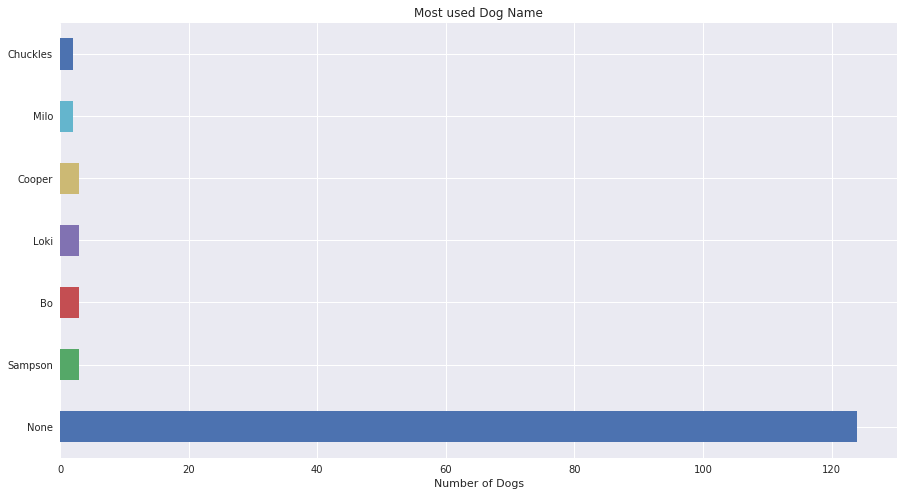

In [50]:
#visualization for top dog names
df.name.value_counts()[0:7].plot('barh', figsize=(15,8), title='Most used Dog Name').set_xlabel("Number of Dogs");





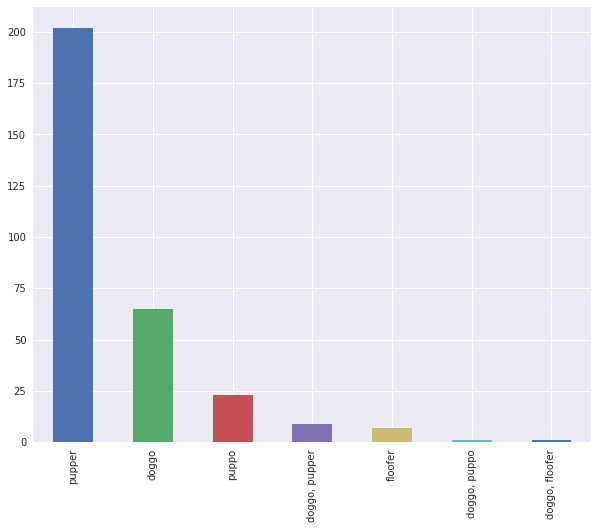

In [51]:
# use value_counts to analyze the dog stages
df.stage.value_counts().plot(kind = 'bar', figsize=(10,8))


from our gathered information its looks Pupper stage was the winner.

In [52]:
df.rating_numerator.value_counts()

11.0    74
12.0    71
10.0    55
13.0    48
9.0     17
14.0    16
8.0     14
7.0      8
5.0      2
6.0      1
3.0      1
27.0     1
Name: rating_numerator, dtype: int64

In [53]:
df.groupby('rating_numerator').name.value_counts()



rating_numerator  name     
3.0               Phil         1
5.0               None         2
6.0               Norman       1
7.0               None         2
                  Chet         1
                  Hamrick      1
                  Herschel     1
                  Jeffri       1
                  Otis         1
                  Patrick      1
8.0               None         4
                  Bubba        1
                  Dwight       1
                  Edmund       1
                  Eve          1
                  Fletcher     1
                  Gerald       1
                  Kellogg      1
                  Lennon       1
                  Malcolm      1
                  Pickles      1
9.0               None         3
                  Abby         1
                  Benji        1
                  Blakely      1
                  Brandy       1
                  Buckley      1
                  Godzilla     1
                  Grady        1
               

from the information above it looks like the top rated dog was sophie.

In [54]:
df.query('rating_numerator == 27')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
103,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,True,cocker_spaniel,0.01595,True,Lhasa,0.006519,True


<img src='https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg'/>